In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import plotly.express as px
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [107]:
df = pd.read_csv('cod.csv')

In [9]:
df.head(15)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
6,bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256
7,ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269,180.379636,45089,3332
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032
9,RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,2.933333,15,138,4844,72765,253.677273,5840,786


In [8]:
df.shape
# Appropriately sized dataset, a 70-30 split between train and test should be feasible.

(1558, 19)

In [10]:
df.isnull().sum()
# Checking for null values in the dataset, none found.

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [11]:
df.isna().sum()
# Checking for NaN values, none found. This does not mean the dataset needs no cleaning.

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [12]:
df.corr()
# Most of the correlation between the variables is justified, for example the correlation between gamesPlayed and wins is high. Understandably, the more games are played, the more games can be won.
# No 100% correlation between variables, therefore no variable needs removal.

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821


In [108]:
def positive_kd(n):
    if n < 1:
        return 0
    else:
        return 1
    
df['Positive_KD'] = df.iloc[:, 3].apply(positive_kd)
df.head(30)
# Creating a new variable called Positive_KD
# K/D ratio is the most prominent success indicator in shooter games. Having a positive k/d means the player is at least moderately successful at the game.
# On the other hand, having a negative k/d means the player's engagements with other players end unfavourable for the player in most cases.
# The values could have been set to 'Positive' - 'Negative', or 'True' - 'False', but in case the variable is used for ML, '0' - '1' works better.

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16,0
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64,1
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5,0
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10,0
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321,1
6,bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256,0
7,ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269,180.379636,45089,3332,0
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032,1
9,RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,2.933333,15,138,4844,72765,253.677273,5840,786,0


In [45]:
df.Positive_KD.value_counts()
# More players are unsuccessful than successful.

0    1264
1     294
Name: Positive_KD, dtype: int64

In [20]:
num_true_cases = len(df[df.Positive_KD == 1])
num_false_cases = len(df[df.Positive_KD == 0])
print('Number of players with positive k/d:',num_true_cases,'-', np.round(num_true_cases / df.shape[0] * 100,2),'%')
print('Number of players with negative k/d:', num_false_cases,'-',np.round(num_false_cases / df.shape[0] * 100,2),'%')
# Exact split between positive and negative k/d players.

Number of players with positive k/d: 294 - 18.87 %
Number of players with negative k/d: 1264 - 81.13 %


In [25]:
# to find out the hidden missing values
print('name has', len(df[df.name == 0]), 'Zero values')
print('wins has', len(df[df.wins == 0]), 'Zero values')
print('kills has', len(df[df.kills == 0]), 'Zero values')
print('kdRatio has', len(df[df.kdRatio == 0]), 'Zero values')
print('killstreak has', len(df[df.killstreak == 0]), 'Zero values')
print('level has', len(df[df.level == 0]), 'Zero values')
print('losses has', len(df[df.losses == 0]), 'Zero values')
print('prestige has', len(df[df.prestige == 0]), 'Zero values')
print('hits has', len(df[df.hits == 0]), 'Zero values')
print('timePlayed has', len(df[df.timePlayed == 0]), 'Zero values')
print('headshots has', len(df[df.headshots == 0]), 'Zero values')
print('averageTime has', len(df[df.averageTime == 0]), 'Zero values')
print('gamesPlayed has', len(df[df.gamesPlayed == 0]), 'Zero values')
print('assists has', len(df[df.assists == 0]), 'Zero values')
print('misses has', len(df[df.misses == 0]), 'Zero values')
print('xp has', len(df[df.xp == 0]), 'Zero values')
print('scorePerMinute has', len(df[df.scorePerMinute == 0]), 'Zero values')
print('shots has', len(df[df.shots == 0]), 'Zero values')
print('deaths has', len(df[df.deaths == 0]), 'Zero values')
print('Positive_KD has', len(df[df.Positive_KD == 0]), 'Zero values')
# All these 0 values can be justified, no cleaning is required yet.

name has 0 Zero values
wins has 529 Zero values
kills has 276 Zero values
kdRatio has 276 Zero values
killstreak has 615 Zero values
level has 0 Zero values
losses has 583 Zero values
prestige has 609 Zero values
hits has 611 Zero values
timePlayed has 210 Zero values
headshots has 383 Zero values
averageTime has 210 Zero values
gamesPlayed has 656 Zero values
assists has 483 Zero values
misses has 601 Zero values
xp has 224 Zero values
scorePerMinute has 597 Zero values
shots has 600 Zero values
deaths has 212 Zero values
Positive_KD has 1264 Zero values


In [55]:
df.corr()
# Correlation is still fine, no columns need removal.

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530,0.213171
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574,0.280615
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437,0.607448
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072,0.296580
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555,0.330553
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198,0.263403
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481,0.181612
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092,0.258293
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276,0.229972
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821,0.286877


In [109]:
feature_cols = ['wins','killstreak','level','losses','prestige','hits','timePlayed','headshots','averageTime','gamesPlayed','assists','misses','xp','scorePerMinute','shots','deaths']
X = df[feature_cols]
y = df['Positive_KD']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# 'kdRatio' has been removed as it made the DecisionTreeClassifier return 1.0 accuracy. Even though there is no observable correlation between 'Positive_KD' and 'kdRatio', the algorithm found the correlation.

In [110]:
print('train %:')
print(np.round(len(X_train) / len(X),2))
print(np.round(len(X_test) / len(X),2))
print('-----')
print('test %:')
print(np.round(len(y_train) / len(X),2))
print(np.round(len(y_test) / len(X),2))

train %:
0.7
0.3
-----
test %:
0.7
0.3


In [111]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42, class_weight='balanced')
model = model.fit(X_train, y_train)

In [112]:
y_pred_train = model.predict(X_train)
print("Accuracy Train Data:",metrics.accuracy_score(y_train, y_pred_train))
# Getting 0.786 accuracy.

Accuracy Train Data: 0.7853211009174312


In [62]:
df.corr()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530,0.213171
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574,0.280615
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437,0.607448
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072,0.296580
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555,0.330553
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198,0.263403
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481,0.181612
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092,0.258293
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276,0.229972
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821,0.286877


In [113]:
y_pred_test = model.predict(X_test)
print("Accuracy Test Data:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy Test Data: 0.7414529914529915


In [114]:
print('Confusion matrix: \n', metrics.confusion_matrix(y_train, y_pred_train))
print('')
print('Classifiaction report: \n', metrics.classification_report(y_train, y_pred_train))


Confusion matrix: 
 [[672 213]
 [ 21 184]]

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       885
           1       0.46      0.90      0.61       205

    accuracy                           0.79      1090
   macro avg       0.72      0.83      0.73      1090
weighted avg       0.87      0.79      0.81      1090



In [71]:
# Overall, what we saw here is that a positive k'd ratio is predictable with 0.74 accuracy.

In [72]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946,0.188703
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443,0.391399
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000,0.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000,0.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000,0.000000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000,1.000000


In [118]:
df.drop('name', inplace=True, axis=1)
# No need for the name variable

In [74]:
df.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
0,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0
1,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16,0
2,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64,1
3,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5,0
4,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10,0


In [85]:
# df = df.drop(df[(df.wins == 0) & (df.losses == 0)].index)
# Removing players with 0 wins and 0 losses in hopes of increasing accuracy, but it didn't

In [119]:
df.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
0,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0
1,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16,0
2,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64,1
3,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5,0
4,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10,0


In [120]:
X = df[['kills', 'deaths']]
X.head()

,kills,deaths
0,0,0
1,0,16
2,66,64
3,2,5
4,2,10


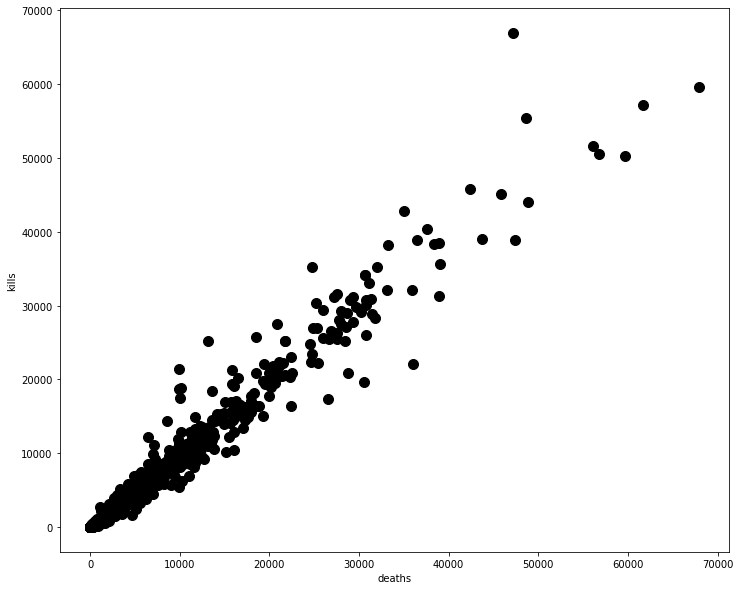

In [123]:
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(X['deaths'], X['kills'], s=100, c='black')
ax.set(xlabel='deaths', ylabel='kills')
plt.show();

In [131]:
target_column = ['averageTime']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,0.043479,0.056069,0.212366,0.029342,0.102103,0.062476,0.407327,0.049226,0.056948,0.053816,21.428416,0.031160,0.047195,0.046964,0.058290,0.260679,0.047733,0.057085,0.188703
std,0.085816,0.118469,0.143486,0.043339,0.157053,0.087572,0.441250,0.109383,0.105119,0.111370,82.640000,0.068453,0.104493,0.101389,0.119953,0.281601,0.103102,0.117733,0.391399
min,0.000000,0.000000,0.000000,0.000000,0.002299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000060,0.087147,0.000000,0.002299,0.000000,0.000000,0.000000,0.000535,0.000085,2.000000,0.000000,0.000000,0.000000,0.000141,0.000000,0.000000,0.000206,0.000000
50%,0.002842,0.002861,0.244279,0.021277,0.025287,0.025000,0.119658,0.001022,0.006819,0.002731,3.031116,0.000801,0.002512,0.001354,0.004273,0.137250,0.001341,0.003962,0.000000
75%,0.047741,0.051479,0.318431,0.051064,0.117241,0.100000,0.940171,0.042961,0.064915,0.051434,9.085714,0.029506,0.041962,0.042356,0.055353,0.535643,0.043528,0.054483,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1349.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1090, 18)
(468, 18)


In [135]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=18, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               9500      
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 64,701
Trainable params: 64,701
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(loss= "mean_squared_error" , optimizer="adam",metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 7474.1367 - mean_squared_error: 7474.1367
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 7030.5444 - mean_squared_error: 7030.5444
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 6486.0054 - mean_squared_error: 6486.0054
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 6164.7827 - mean_squared_error: 6164.7827
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 5959.3066 - mean_squared_error: 5959.3066
Epoch 6/20
35/35 [==============================] - 0s 2ms/step - loss: 5757.4766 - mean_squared_error: 5757.4766
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 5633.1401 - mean_squared_error: 5633.1401
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 5484.2974 - mean_squared_error: 5484.2974
Epoch 9/20
35/35 [==============================] - 0s 2ms/step - loss: 5400.0991 - mean

In [137]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))


35/35 [==============================] - 0s 1ms/step
55.11218199120441
15/15 [==============================] - 0s 1ms/step
51.96616284443068
